Processing file: output/Experimenter_CREW_999_1_All_1731617801.mp4.csv
Video :  Experimenter_CREW_999_1_All_1731617801.mp4


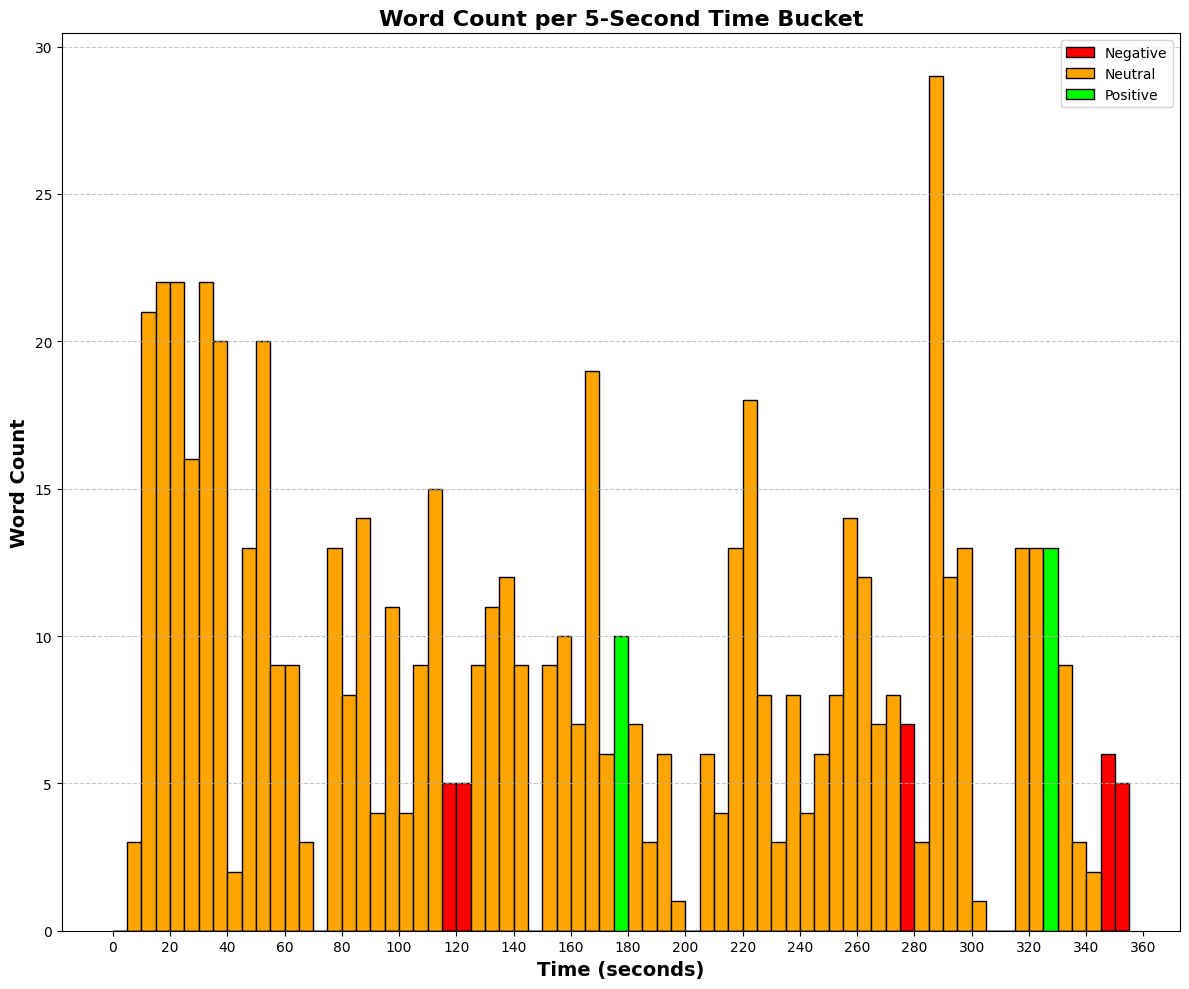

Video:  Experimenter_CREW_999_1_All_1731617801.mp4


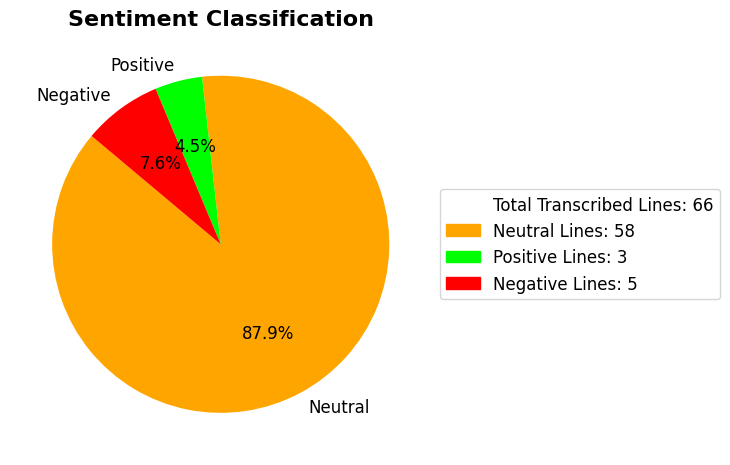

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

OUTPUT_DIR = "output/"  # Folder where CSV files are stored



def get_csv_files(directory):
    """Returns a list of all CSV files in the output directory."""
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(".csv")]

def generate_histogram(csv_file):
    """Reads a CSV transcription file and creates a histogram of word counts per 5s bucket, colored by sentiment."""
    df = pd.read_csv(csv_file)

    # Normalizing column names
    df.columns = df.columns.str.strip().str.lower()

    if 'timestamp' not in df.columns or 'transcription' not in df.columns or 'sentiment' not in df.columns:
        print(f"Error: CSV file {csv_file} must contain 'Timestamp', 'Transcription', and 'Sentiment' columns.")
        print("Found columns:", df.columns)  # Debugging output
        return

    # Convert timestamps to seconds
    df['start_seconds'] = df['timestamp']

    # Find max time to define histogram range
    max_time = df['start_seconds'].max()

    # Define 5-second interval buckets
    buckets = np.arange(0, max_time + 5, 5)  # Step size of 5 seconds

    # Initialize word count dictionary with sentiment colors
    colors = {'Negative': 'red', 'Neutral': 'orange', 'Positive': 'lime'}
    word_counts = {sentiment: np.zeros(len(buckets) - 1) for sentiment in colors}

    # Count words in each 5-second bucket based on sentiment
    for _, row in df.iterrows():
        words = str(row['transcription']).split()  # Split into words
        timestamp = row['start_seconds']
        sentiment = row['sentiment']

        # Find the appropriate bucket
        bucket_index = np.searchsorted(buckets, timestamp, side='right') - 1
        if 0 <= bucket_index < len(buckets) - 1:
            word_counts[sentiment][bucket_index] += len(words)  # Count words per sentiment

    video_name = os.path.splitext(os.path.basename(csv_file))[0]
    print("Video : ",video_name)


    # Plot histogram
    plt.figure(figsize=(12, 10))

    for sentiment, counts in word_counts.items():
        plt.bar(buckets[:-1], counts, width=5, align='edge', color=colors[sentiment], label=sentiment, edgecolor='black')

    # Set x-axis ticks at 20s intervals
    plt.xticks(np.arange(0, max_time + 20, 20)) 
    plt.xlabel("Time (seconds)", fontsize=14, fontweight="bold")
    plt.ylabel("Word Count", fontsize=14, fontweight="bold")
    plt.title(f"Word Count per 5-Second Time Bucket", fontsize=16, fontweight="bold")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()




def plot_sentiment_pie_chart(csv_file):
    """Creates a pie chart to show the percentage of each sentiment in the dataset, with the legend outside."""
    df = pd.read_csv(csv_file)

    # Normalize column names
    df.columns = df.columns.str.strip().str.lower()

    if 'sentiment' not in df.columns:
        print(f"Error: CSV file {csv_file} must contain a 'Sentiment' column.")
        return

    # Count sentiment occurrences
    sentiment_counts = df['sentiment'].value_counts()
    total_lines = len(df)

    # Define colors
    colors = {'Neutral': 'orange', 'Positive': 'lime', 'Negative': 'red'}
    sentiment_labels = ['Neutral', 'Positive', 'Negative']
    sentiment_values = [sentiment_counts.get(label, 0) for label in sentiment_labels]

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(7, 6))

    # Plot pie chart
    ax.pie(
        sentiment_values, labels=sentiment_labels, autopct='%1.1f%%',
        colors=[colors[label] for label in sentiment_labels], startangle=140, textprops={'fontsize': 12}
    )

    # Extract video name without file extension
    video_name = os.path.splitext(os.path.basename(csv_file))[0]
    print("Video: ", video_name)

    # Define custom legend labels
    legend_labels = [
        f"Total Transcribed Lines: {total_lines}",
        f"Neutral Lines: {sentiment_counts.get('Neutral', 0)}",
        f"Positive Lines: {sentiment_counts.get('Positive', 0)}",
        f"Negative Lines: {sentiment_counts.get('Negative', 0)}"
    ]
   

    # Create custom patches for legend
    legend_patches = [mpatches.Patch(color="white", label=legend_labels[0])] + \
                     [mpatches.Patch(color=colors[label], label=legend_labels[i + 1]) for i, label in enumerate(sentiment_labels)]
   
    # Set up the custom legend
    plt.legend(
        handles=legend_patches,
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=12
    )
    plt.title("Sentiment Classification", fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    csv_files = get_csv_files(OUTPUT_DIR)

    if not csv_files:
        print("No CSV files found in the output directory.")   
    else:
        for csv_file in csv_files:
            print(f"Processing file: {csv_file}")
            generate_histogram(csv_file)
            plot_sentiment_pie_chart(csv_file)
